In [1]:
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
money = pd.read_csv('usd_rate_2018-2019.csv') #Загружаем данные о курсе доллара США с сайта Центробанка РФ

In [5]:
past = 7*4 # Прогноз курса доллара США производится на основе 28 предыдущих дней
future = 7 # Прогноз делается на 7 дней вперед

In [283]:
values = money['curs']

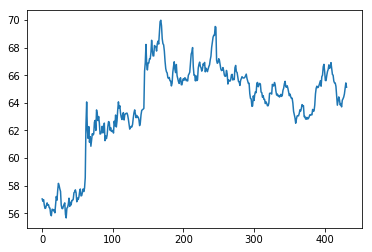

In [8]:
plt.plot(values) # График изменения курса доллара США с 1 января 2018г по 3 октября 2019г

In [9]:
start = past
end = len(values) - future

prepared = []  # Подготовка данных для обучения

for i in range(start,end):
    past_and_future_value = values[(i-past):(i+future)]
    prepared.append(list(past_and_future_value))

In [14]:
past_columns = [f'past_{i}' for i in range(past)] # Генерация названия колонок для датафрейма
future_columns = [f'future_{i}' for i in range(future)]

In [16]:
df = pd.DataFrame(prepared, columns=(past_columns+future_columns))

In [17]:
df # Датафрейм, содержащий информацию о курсе для выбранных 7 дней и 28 днях, предшествующих им

,past_0,past_1,past_2,past_3,past_4,past_5,past_6,past_7,past_8,past_9,...,past_25,past_26,past_27,future_0,future_1,future_2,future_3,future_4,future_5,future_6
0,57.0463,56.8734,56.9957,56.6019,56.3569,56.3878,56.5925,56.7597,56.5892,56.6261,...,57.7701,57.5899,56.5918,56.3554,56.3438,56.5201,56.6537,56.7608,55.9208,55.6717
1,56.8734,56.9957,56.6019,56.3569,56.3878,56.5925,56.7597,56.5892,56.6261,56.4115,...,57.5899,56.5918,56.3554,56.3438,56.5201,56.6537,56.7608,55.9208,55.6717,56.3742
2,56.9957,56.6019,56.3569,56.3878,56.5925,56.7597,56.5892,56.6261,56.4115,56.3888,...,56.5918,56.3554,56.3438,56.5201,56.6537,56.7608,55.9208,55.6717,56.3742,56.4334
3,56.6019,56.3569,56.3878,56.5925,56.7597,56.5892,56.6261,56.4115,56.3888,55.9288,...,56.3554,56.3438,56.5201,56.6537,56.7608,55.9208,55.6717,56.3742,56.4334,56.6616
4,56.3569,56.3878,56.5925,56.7597,56.5892,56.6261,56.4115,56.3888,55.9288,55.8288,...,56.3438,56.5201,56.6537,56.7608,55.9208,55.6717,56.3742,56.4334,56.6616,57.1000
5,56.3878,56.5925,56.7597,56.5892,56.6261,56.4115,56.3888,55.9288,55.8288,56.2908,...,56.5201,56.6537,56.7608,55.9208,55.6717,56.3742,56.4334,56.6616,57.1000,56.5041
6,56.5925,56.7597,56.5892,56.6261,56.4115,56.3888,55.9288,55.8288,56.2908,56.2914,...,56.6537,56.7608,55.9208,55.6717,56.3742,56.4334,56.6616,57.1000,56.5041,56.8011
7,56.7597,56.5892,56.6261,56.4115,56.3888,55.9288,55.8288,56.2908,56.2914,56.1840,...,56.7608,55.9208,55.6717,56.3742,56.4334,56.6616,57.1000,56.5041,56.8011,56.6122
8,56.5892,56.6261,56.4115,56.3888,55.9288,55.8288,56.2908,56.2914,56.1840,56.2613,...,55.9208,55.6717,56.3742,56.4334,56.6616,57.1000,56.5041,56.8011,56.6122,56.9359
9,56.6261,56.4115,56.3888,55.9288,55.8288,56.2908,56.2914,56.1840,56.2613,56.0408,...,55.6717,56.3742,56.4334,56.6616,57.1000,56.5041,56.8011,56.6122,56.9359,56.9372


# Обучение и результат работы различных моделей регрессии

# Linear Regression

In [268]:
from sklearn.linear_model import LinearRegression

In [269]:
LinReg = LinearRegression()

In [270]:
X = df[past_columns][:-1] # Создание тренировочной выборки
Y = df[future_columns][:-1]

In [271]:
X_test = df[past_columns][-1:] # Создание тестовой выборки
Y_test = df[future_columns][-1:]

In [272]:
LinReg.fit(X,Y) # Обучение модели

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [273]:
prediction = LinReg.predict(X_test) # Предсказание модели для тестовой выборки

In [274]:
prediction

array([[64.16412047, 64.25996538, 64.25148978, 64.15781021, 64.17147762,
        64.27480852, 64.41572127]])

In [275]:
Y_test

,future_0,future_1,future_2,future_3,future_4,future_5,future_6
396,63.706,64.1873,64.2888,64.4156,64.6407,65.067,65.4399


In [276]:
np.linalg.norm(Y_test - prediction)  # Вычисление нормы вектора разности реального курса и спрогнозированного

1.4763743816775143

In [277]:
from sklearn.metrics import mean_absolute_error

In [278]:
mean_absolute_error(Y_test, prediction) # Вычисление средней абсолютной ошибки

0.44449692179824957

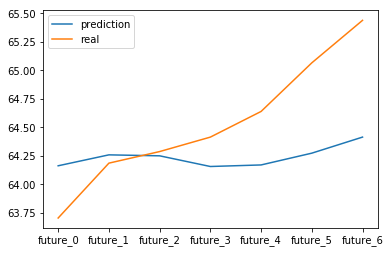

In [279]:
plt.plot(prediction[0],label='prediction') # График реального и спрогнозированного моделью курса доллара США
plt.plot(Y_test.iloc[0], label='real')
plt.legend()

# Multi-layer Perceptron (MLP) Regressor

In [35]:
from sklearn.neural_network import MLPRegressor

In [198]:
MLP = MLPRegressor(random_state=42, max_iter=300, hidden_layer_sizes=(150,150))

In [199]:
MLP.fit(X,Y)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(150, 150), learning_rate='constant',
       learning_rate_init=0.001, max_iter=300, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=42, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [200]:
prediction = MLP.predict(X_test)

In [201]:
prediction

array([[64.11236553, 64.13344497, 64.38745194, 64.29150093, 64.1517286 ,
        64.52868612, 64.60090518]])

In [202]:
Y_test

,future_0,future_1,future_2,future_3,future_4,future_5,future_6
396,63.706,64.1873,64.2888,64.4156,64.6407,65.067,65.4399


In [203]:
np.linalg.norm(Y_test - prediction)

1.1941328491011756

In [204]:
mean_absolute_error(Y_test, prediction)

0.3641788091852395

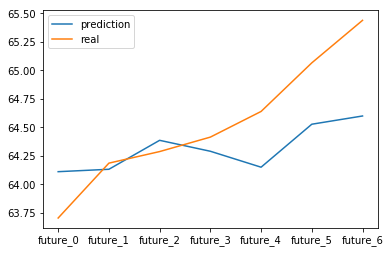

In [205]:
plt.plot(prediction[0],label='prediction')
plt.plot(Y_test.iloc[0], label='real')
plt.legend()

# Random Forest Regressor

In [206]:
from sklearn.ensemble import RandomForestRegressor

In [207]:
regr = RandomForestRegressor(random_state=42)

In [208]:
regr.fit(X,Y)

C:\Users\Acer\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [209]:
prediction = regr.predict(X_test)

In [210]:
np.linalg.norm(Y_test - prediction)

1.1399618790994677

In [211]:
mean_absolute_error(Y_test, prediction)

0.3564742857142826

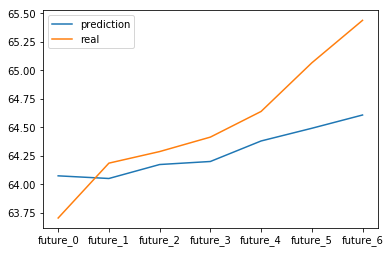

In [212]:
plt.plot(prediction[0],label='prediction')
plt.plot(Y_test.iloc[0], label='real')
plt.legend()

# Elastic Net

In [256]:
from sklearn.linear_model import ElasticNet

In [262]:
ElNet = ElasticNet(random_state=42)

In [263]:
ElNet.fit(X,Y)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=42, selection='cyclic', tol=0.0001, warm_start=False)

In [264]:
prediction = ElNet.predict(X_test)

In [265]:
np.linalg.norm(Y_test - prediction)

1.3798958723392514

In [266]:
mean_absolute_error(Y_test, prediction)

0.3891709709851097

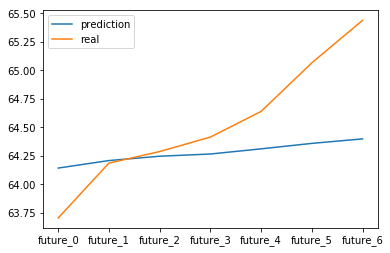

In [267]:
plt.plot(prediction[0],label='prediction')
plt.plot(Y_test.iloc[0], label='real')
plt.legend()

# Выводы

Рассматривалась задача прогнозирования курса доллара США на 7 дней вперед на основе курса за предшествующие 28 дней с применением регрессионных моделей. Подбором гиперпараметров для MLPRegressor удалось добиться средней абсолютной ошибки равной 0.3641788091852395. Значения средней абсолютной ошибки у рассмотренных моделей лежат в диапазоне 35-44 копейки. Лучший прогноз произвела модель Random Forest Regressor в то время, как линейные модели продемонстрировали худший результат.